In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhanalakshmic","key":"319557121ae271d227d66391680ba9a3"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir image_dataset
%cd image_dataset

/content/image_dataset


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=b1958012141137e9606af50bfe8ea2b9282793645c7a3ded3c8224617aac25ff
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle competitions download -c image-classification-2

100% 8.00G/8.01G [00:59<00:00, 210MB/s]
100% 8.01G/8.01G [00:59<00:00, 145MB/s]


In [ ]:
!unzip image-classification-2.zip -d image-dataset

Streaming output truncated to the last 5000 lines.
  inflating: image-dataset/train/Image_026830.jpg  
  inflating: image-dataset/train/Image_026831.jpg  
  inflating: image-dataset/train/Image_026832.jpg  
  inflating: image-dataset/train/Image_026833.jpg  
  inflating: image-dataset/train/Image_026834.jpg  
  inflating: image-dataset/train/Image_026835.jpg  
  inflating: image-dataset/train/Image_026836.jpg  
  inflating: image-dataset/train/Image_026837.jpg  
  inflating: image-dataset/train/Image_026838.jpg  
  inflating: image-dataset/train/Image_026839.jpg  
  inflating: image-dataset/train/Image_026840.jpg  
  inflating: image-dataset/train/Image_026841.jpg  
  inflating: image-dataset/train/Image_026842.jpg  
  inflating: image-dataset/train/Image_026843.jpg  
  inflating: image-dataset/train/Image_026844.jpg  
  inflating: image-dataset/train/Image_026845.jpg  
  inflating: image-dataset/train/Image_026846.jpg  
  inflating: image-dataset/train/Image_026847.jpg  
  inflating: 

In [ ]:
import os
import math
import random
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

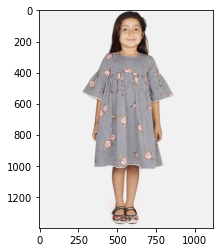

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('/content/image_dataset/image-dataset/train/Image_003228.jpg')
plt.imshow(img)

In [ ]:
img.shape

(1400, 1117, 3)

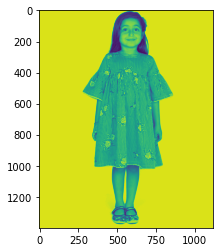

In [ ]:
from skimage.color import rgb2gray
gray_image = rgb2gray(img)
plt.imshow(gray_image)

In [ ]:
gray_image.shape

(1400, 1117)

In [ ]:
gray_image

array([[0.94509804, 0.94509804, 0.94509804, ..., 0.94509804, 0.94509804,
        0.94509804],
       [0.94509804, 0.94509804, 0.94509804, ..., 0.94509804, 0.94509804,
        0.94509804],
       [0.94509804, 0.94509804, 0.94509804, ..., 0.94509804, 0.94509804,
        0.94509804],
       ...,
       [0.94509804, 0.94509804, 0.94509804, ..., 0.94509804, 0.94509804,
        0.94509804],
       [0.94509804, 0.94509804, 0.94509804, ..., 0.94509804, 0.94509804,
        0.94509804],
       [0.94509804, 0.94509804, 0.94509804, ..., 0.94509804, 0.94509804,
        0.94509804]])

In [ ]:
flat_image = gray_image.ravel()

In [ ]:
flat_image

array([0.94509804, 0.94509804, 0.94509804, ..., 0.94509804, 0.94509804,
       0.94509804])

In [ ]:
flat_image.shape

(1563800,)

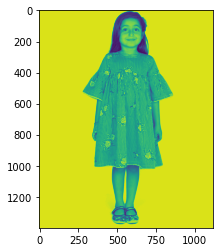

In [ ]:
plt.imshow(flat_image.reshape(1400, 1117))

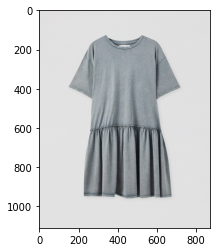

In [ ]:
img2 = mpimg.imread('/content/image_dataset/image-dataset/train/Image_018022.jpg')
plt.imshow(img2)

In [ ]:
img2.shape

(1110, 870, 3)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from skimage.io import imsave
import shutil

In [ ]:
df_train = pd.read_csv('/content/image_dataset/image-dataset/train_label.csv')

In [ ]:
df_train.head()

,file_name,label
0,Image_000000.jpg,8
1,Image_000001.jpg,8
2,Image_000002.jpg,8
3,Image_000003.jpg,8
4,Image_000004.jpg,8


In [ ]:
df_train.label.value_counts()

6     6285
3     4139
9     3933
7     3664
2     2778
5     2433
8     2338
0     2166
4     2052
10    1039
1      922
Name: label, dtype: int64

In [ ]:
BASE_DIR = '/content/image_dataset/image-dataset/train/'
len(os.listdir(BASE_DIR))

31749

In [ ]:
%cd /content/

/content


In [ ]:
!mkdir sample

In [ ]:
for name in range(0,11):
    os.makedirs('/content/sample/'+str(name))

In [ ]:
os.listdir('/content/sample')

['2', '6', '0', '5', '8', '9', '4', '10', '3', '7', '1']

In [ ]:
os.listdir('/content/sample')[0]

'2'

In [ ]:
os.path.join('/content/sample', str(0))

'/content/sample/0'

In [ ]:
df_train.label[0] == int(os.path.basename('/content/sample/8'))

True

In [ ]:
os.path.basename('/content/sample/4')

'4'

In [ ]:
len(os.listdir('/content/sample/1/'))

0

In [ ]:
for index in df_train.index:
    for folder_name in range(0,11):
        if df_train.loc[index, 'label'] == int(os.path.basename('/content/sample/'+str(folder_name))):
            # file = mpimg.imread(BASE_DIR+df_train.loc[index, 'file_name'])
            # imsave(os.path.join('/content/sample/'+str(folder_name)+'/',df_train.loc[index, 'file_name']), rgb2gray(file))
            shutil.copy(BASE_DIR+df_train.loc[index, 'file_name'], os.path.join('/content/sample/'+str(folder_name)+'/'))

In [ ]:
NEW_BASE = '/content/sample/'

In [ ]:
len(os.listdir(NEW_BASE+'0/'))

2166

In [ ]:
os.listdir(NEW_BASE+'0/')[0]

'Image_011836.jpg'

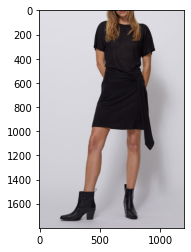

In [ ]:
plt.imshow(mpimg.imread(NEW_BASE+'0/Image_011790.jpg'))

In [ ]:
os.makedirs('/content/sample/train')
os.makedirs('/content/sample/test')
os.makedirs('/content/sample/val')

In [ ]:
for i in range(0,11):
    os.makedirs(NEW_BASE+'train/'+str(i))
    os.makedirs(NEW_BASE+'test/'+str(i))
    os.makedirs(NEW_BASE+'val/'+str(i))

In [ ]:
os.listdir('/content/sample/train/')

['2', '6', '0', '5', '8', '9', '4', '10', '3', '7', '1']

In [ ]:
folder_list = [str(i)+'/' for i in range(0,11)]
folder_list

['0/', '1/', '2/', '3/', '4/', '5/', '6/', '7/', '8/', '9/', '10/']

In [ ]:
NEW_BASE = '/content/sample/'

In [ ]:
for folder_idx, folder in enumerate(folder_list):
    files = os.listdir(NEW_BASE + folder)
    folder_name = folder.split('/')[0]
    number_of_images = len([name for name in files])
    n_train = int((number_of_images * 0.6) + 0.5)
    n_valid = int((number_of_images*0.25) + 0.5)
    n_test = number_of_images - n_train - n_valid
    print(number_of_images, n_train, n_valid, n_test)
    for idx, file in enumerate(files):
        file_name = NEW_BASE + folder + file
        if idx < n_train:
            shutil.move(file_name, NEW_BASE + "train/" + folder_name)
        elif idx < n_train + n_valid:
            shutil.move(file_name, NEW_BASE + "val/" + folder_name)
        else:
            shutil.move(file_name, NEW_BASE + "test/" + folder_name)

2166 1300 542 324
922 553 231 138
2778 1667 695 416
4139 2483 1035 621
2052 1231 513 308
2433 1460 608 365
6285 3771 1571 943
3664 2198 916 550
2338 1403 585 350
3933 2360 983 590
1039 623 260 156


In [ ]:
name_list = [str(i) for i in range(0, 11)]
name_list

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [ ]:
vgg_model = tf.keras.applications.vgg16.VGG16()
print(type(vgg_model))
vgg_model.summary()

553476096/553467096 [==============================] - 5s 0us/step
<class 'keras.engine.functional.Functional'>
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
               

In [ ]:
model = keras.models.Sequential()
for layer in vgg_model.layers[0:-1]:
    model.add(layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
model.add(layers.Dense(11))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.01)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [ ]:
preprocess_input = tf.keras.applications.vgg16.preprocess_input

In [ ]:
train_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
valid_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_batches = train_gen.flow_from_directory(
    '/content/sample/train',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=32,
    shuffle=True,
    color_mode="rgb",
    classes=name_list   
)

val_batches = valid_gen.flow_from_directory(
    '/content/sample/val',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=32,
    shuffle=True,
    color_mode="rgb",
    classes=name_list
)

test_batches = test_gen.flow_from_directory(
    '/content/sample/test',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=32,
    shuffle=False,
    color_mode="rgb",
    classes=name_list
)

Found 19049 images belonging to 11 classes.
Found 7939 images belonging to 11 classes.
Found 4761 images belonging to 11 classes.


In [ ]:
epochs = 20

# early_stopping = keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     patience=5,
#     verbose=2
# )

history = model.fit(train_batches, validation_data=val_batches,
          # callbacks=[early_stopping],
          epochs=epochs, verbose=2)

Epoch 1/20
596/596 - 710s - loss: 6.2612 - accuracy: 0.3873 - val_loss: 6.2150 - val_accuracy: 0.4082 - 710s/epoch - 1s/step
Epoch 2/20
596/596 - 646s - loss: 5.5922 - accuracy: 0.4741 - val_loss: 6.7505 - val_accuracy: 0.4192 - 646s/epoch - 1s/step
Epoch 3/20
596/596 - 642s - loss: 5.2085 - accuracy: 0.5160 - val_loss: 6.6325 - val_accuracy: 0.4652 - 642s/epoch - 1s/step
Epoch 4/20
596/596 - 646s - loss: 4.8066 - accuracy: 0.5441 - val_loss: 6.2450 - val_accuracy: 0.4906 - 646s/epoch - 1s/step
Epoch 5/20
596/596 - 643s - loss: 4.5883 - accuracy: 0.5588 - val_loss: 7.9750 - val_accuracy: 0.4373 - 643s/epoch - 1s/step
Epoch 6/20
596/596 - 642s - loss: 4.5519 - accuracy: 0.5787 - val_loss: 7.4305 - val_accuracy: 0.4957 - 642s/epoch - 1s/step
Epoch 7/20
596/596 - 639s - loss: 4.3654 - accuracy: 0.5996 - val_loss: 8.0902 - val_accuracy: 0.4632 - 639s/epoch - 1s/step
Epoch 8/20
596/596 - 641s - loss: 4.0256 - accuracy: 0.6175 - val_loss: 7.9774 - val_accuracy: 0.4605 - 641s/epoch - 1s/step


In [ ]:
model.save('model.h5')

In [ ]:
model.evaluate(test_batches, verbose=2)